In [1]:
import sys, os
import numpy as np
import time, h5py
codepath = '/user_data/mmhender/imStat/code'
sys.path.append(codepath)
from utils import default_paths, nsd_utils, numpy_utils, stats_utils
from model_fitting import initialize_fitting 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import argparse
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

In [22]:
# load LDA results
subject =1;
discrim_type='animacy';
which_prf_grid = 3

path_to_load = default_paths.sketch_token_feat_path
path_to_save = os.path.join(path_to_load, 'LDA')
if which_prf_grid !=1:
    fn2save = os.path.join(path_to_save, 'S%d_LDA_%s_grid%d.npy'%(subject, discrim_type, which_prf_grid))
else:
    fn2save = os.path.join(path_to_save, 'S%d_LDA_%s.npy'%(subject, discrim_type))
print('loading from %s'%fn2save)
lda_result = np.load(fn2save,allow_pickle=True).item()

loading from /user_data/mmhender/features/sketch_tokens/LDA/S1_LDA_animacy_grid3.npy


In [23]:
# Params for the spatial aspect of the model (possible pRFs)
aperture_rf_range = 1.1
aperture, models = initialize_fitting.get_prf_models(aperture_rf_range=aperture_rf_range, \
                                                     which_grid=which_prf_grid)    
n_prfs = models.shape[0]

number of pRFs: 1114
most extreme RF positions:
[-0.55 -0.55  0.04]
[ 0.  0. 10.]


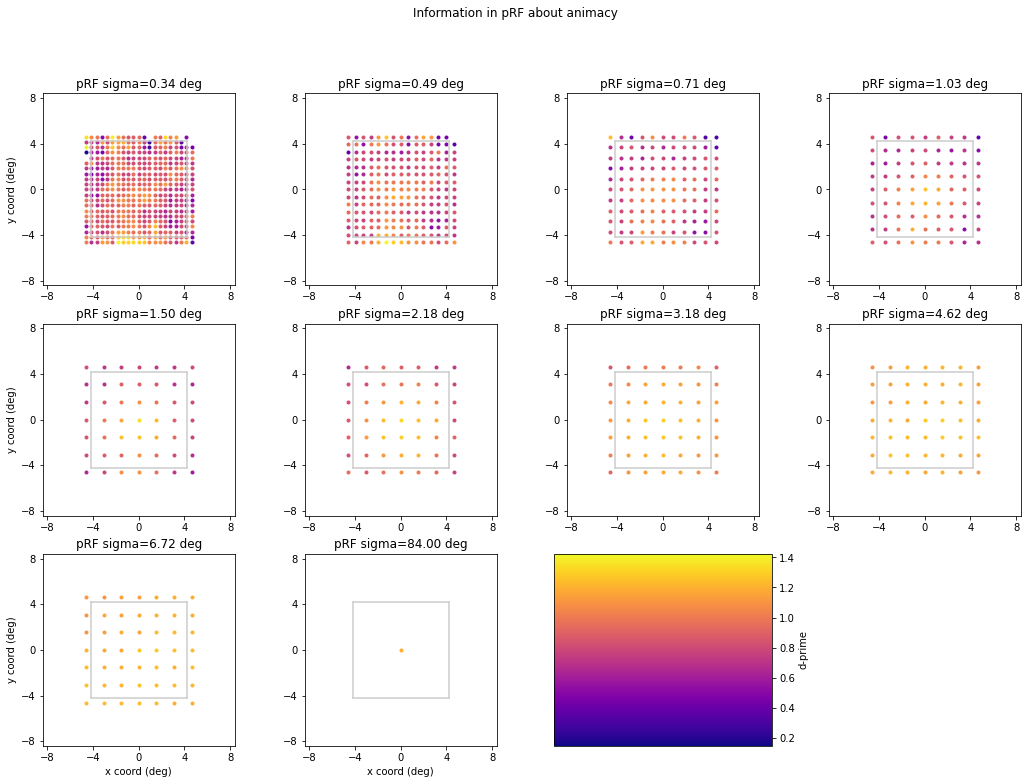

In [24]:
prf_models = models

unique_sizes = np.unique(np.round(prf_models[:,2],4))

fig = plt.figure(figsize=(18,12));

n_color_steps = 100
colors = cm.plasma(np.linspace(0,1,n_color_steps))
min_dprime = 0
dprime_vals = np.array(lda_result['val_dprime'])
dprime_range = [np.min(dprime_vals[dprime_vals>min_dprime]), \
                np.max(dprime_vals[dprime_vals>min_dprime])]
# dprime_range = [0, 1.4]
dprime_steps = np.linspace(dprime_range[0], dprime_range[1], n_color_steps)
screen_eccen_deg = 8.4
xylims = 1.0*screen_eccen_deg

for si, size in enumerate(unique_sizes):

    inds = np.where(np.round(prf_models[:,2],4)==size)[0]

    prf_models_plot = models[inds,:]
    dprime_plot = np.array(lda_result['val_dprime'])[inds]
    inds2plot = np.where(dprime_plot>min_dprime)[0]
    
    plt.subplot(3,4,si+1)
    ax = plt.gca()
        
    for mm in inds2plot:
        x,y,sigma = prf_models_plot[mm,:]
        dprime = dprime_plot[mm]
        color_ind = np.argmin(np.abs(dprime_steps-dprime))
        plt.plot(x*screen_eccen_deg,y*screen_eccen_deg,'.', color=colors[color_ind,:])  
        
    plt.axis('square')
    plt.xlim([-xylims, xylims])
    plt.ylim([-xylims, xylims])
    plt.xticks(np.arange(-8,9,4))
    plt.yticks(np.arange(-8,9,4))
    
    plt.plot([screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,-screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [-screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])

    if si>7:
        plt.xlabel('x coord (deg)')
    if np.mod(si,4)==0:
        plt.ylabel('y coord (deg)')

    plt.title('pRF sigma=%.2f deg'%(size*screen_eccen_deg))
    
ax = plt.subplot(3,4,si+2)
scalmap = cm.ScalarMappable(matplotlib.colors.Normalize(vmin=dprime_range[0], vmax=dprime_range[1]),\
                  cmap='plasma')
fig.colorbar(scalmap, orientation='vertical', label='d-prime',cax=ax)

plt.suptitle('Information in pRF about %s'%discrim_type);

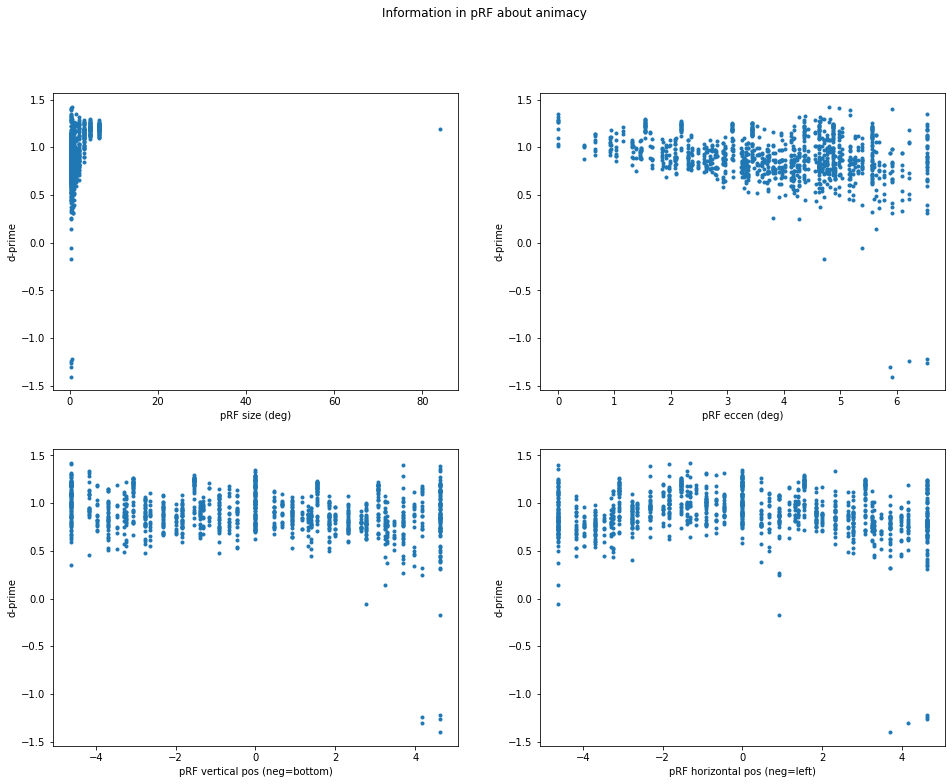

In [25]:
plt.figure(figsize=(16,12));
dprime_vals = np.array(lda_result['val_dprime'])

plt.subplot(2,2,1)
plt.plot(models[:,2]*screen_eccen_deg, dprime_vals,'.')
plt.xlabel('pRF size (deg)')
plt.ylabel('d-prime')

plt.subplot(2,2,2)
plt.plot(np.sqrt(models[:,0]**2+models[:,1]**2)*screen_eccen_deg, dprime_vals,'.')
plt.xlabel('pRF eccen (deg)')
plt.ylabel('d-prime')

plt.subplot(2,2,3)
plt.plot(models[:,1]*screen_eccen_deg, dprime_vals,'.')
plt.xlabel('pRF vertical pos (neg=bottom)')
plt.ylabel('d-prime')

plt.subplot(2,2,4)
plt.plot(models[:,0]*screen_eccen_deg, dprime_vals,'.')
plt.xlabel('pRF horizontal pos (neg=left)')
plt.ylabel('d-prime')

plt.suptitle('Information in pRF about %s'%discrim_type);

In [16]:
# Load results of the fitting procedure - going to look at how above results relate to pRF 
# fits in different areas

from plotting import load_fits
subject = 1
volume_space=True
fitting_type = 'sketch_tokens'

root = os.path.dirname(os.path.dirname(os.getcwd()))
out, fig_save_folder = load_fits.load_fit_results(subject, volume_space, fitting_type, \
                                                  n_from_end=1, root=root, verbose=True);
# load_fits.print_output_summary(out)

if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

loading from /user_data/mmhender/imStat/model_fits/S01/sketch_tokens/Oct-19-2021_1224_16/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_range', 'models', 'n_prf_sd_out', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'stack_result', 'stack_result_lo', 'partial_models_used_for_stack', 'train_r2', 'train_cc', 'zscore_features', 'zscore_in_groups', 'ridge', 'debug', 'up_to_sess', 'shuff_rnd_seed', 'use_precomputed_prfs', 'pop_recs', 'voxel_recs', 'min_pct_var', 'max_pc_to_retain', 'use_pca_st_feats', 'use_lda_st_feats', 'lda_discrim_type'])


In [18]:
out['models'].shape

(875, 3)

In [17]:
from utils import roi_utils
roi_def = roi_utils.get_combined_rois(subject,include_all=True,include_body=True,volume_space=True,verbose=False) 
skip_inds = [10,11,15,23]
retlabs, facelabs, placelabs, bodylabs, \
        ret_names, face_names, place_names, body_names = roi_def
roi_names = ret_names+face_names+place_names+body_names
nret = len(ret_names)
nface = len(face_names)
nplace = len(place_names)
nbody = len(body_names)    
n_rois = len(ret_names) + len(face_names) + len(place_names) + len(body_names)

is_ret = np.arange(0, n_rois)<nret
is_face = (np.arange(0, n_rois)>=nret) & (np.arange(0, n_rois)<nret+nface)
is_place = (np.arange(0, n_rois)>=nret+nface) & (np.arange(0, n_rois)<nret+nface+nplace)
is_body = np.arange(0, n_rois)>=nret+nface+nplace


Text(0, 0.5, 'n voxels preferring this pRF')

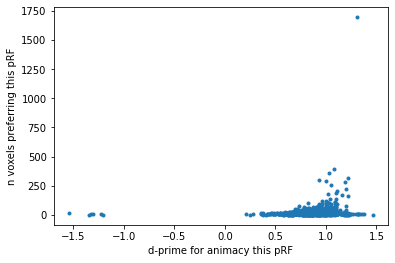

In [19]:
prf_models = models

dprime_vals = np.array(lda_result['val_dprime'])
neach = np.array([np.sum(out['best_params'][5][:,0]==mm) for mm in range(n_prfs)])

plt.figure();

plt.plot(dprime_vals, neach,'.')
plt.xlabel('d-prime for %s this pRF'%(discrim_type))
plt.ylabel('n voxels preferring this pRF')

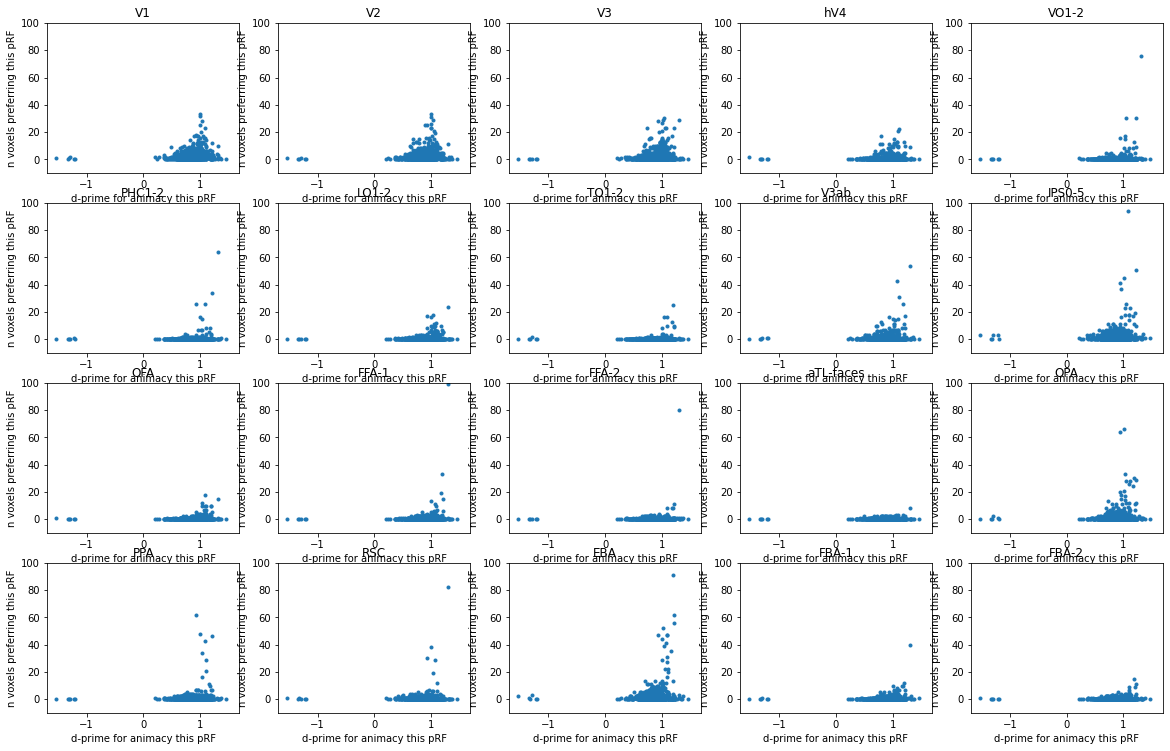

In [20]:
prf_models = models

dprime_vals = np.array(lda_result['val_dprime'])


plt.figure(figsize=(20,16))
npx = int(np.ceil(np.sqrt(n_rois)))
npy = int(np.ceil(n_rois/npx))

pi=0
for rr in range(n_rois):

    if rr not in skip_inds:
        if is_ret[rr]:
            inds_this_roi = retlabs==rr
            rname = ret_names[rr]
        elif is_face[rr]:
            inds_this_roi = facelabs==(rr-nret)
            rname = face_names[rr-nret]
        elif is_place[rr]:
            inds_this_roi = placelabs==(rr-nret-nface)
            rname = place_names[rr-nret-nface]
        elif is_body[rr]:
            inds_this_roi = bodylabs==(rr-nret-nface-nplace)
            rname = body_names[rr-nret-nface-nplace]

        pi+=1
        plt.subplot(npx,npy,pi)
        neach = np.array([np.sum(out['best_params'][5][inds_this_roi,0]==mm) for mm in range(n_prfs)])

        plt.plot(dprime_vals, neach,'.')
        plt.xlabel('d-prime for %s this pRF'%(discrim_type))
        plt.ylabel('n voxels preferring this pRF')
        plt.title(rname)
        plt.xlim([-1.7, 1.7])
        plt.ylim([-10,100])


In [33]:
dprime_vals.shape

(875,)

Text(0.5, 0.98, 'Number of voxels all areas with this pRF')

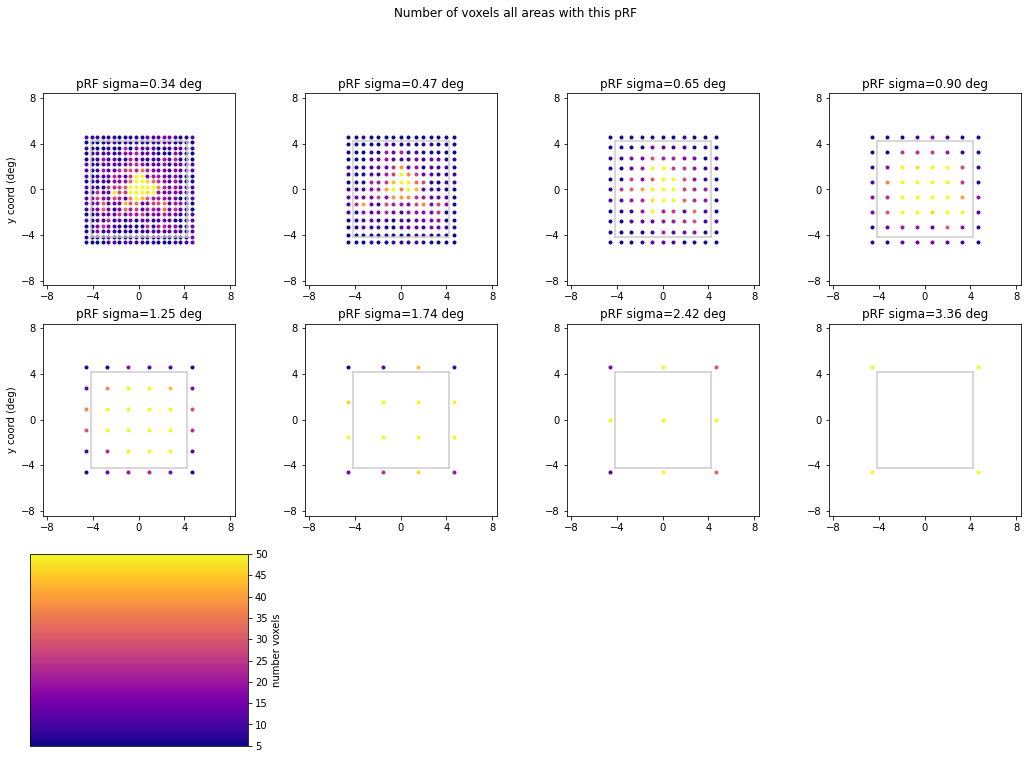

In [21]:
prf_models = models
neach = np.array([np.sum(out['best_params'][5][:,0]==mm) for mm in range(n_prfs)])
unique_sizes = np.unique(np.round(prf_models[:,2],4))

fig = plt.figure(figsize=(18,12));

n_color_steps = np.max(neach)
colors = cm.plasma(np.linspace(0,1,n_color_steps))
# vals_range = [np.min(neach), \
#                 np.max(neach)]
vals_range = [5,50]
vals_steps = np.linspace(vals_range[0], vals_range[1], n_color_steps)
screen_eccen_deg = 8.4
xylims = 1.0*screen_eccen_deg

for si, size in enumerate(unique_sizes):

    inds = np.where(np.round(prf_models[:,2],4)==size)[0]

    prf_models_plot = models[inds,:]
    vals_plot = neach[inds]
#     dprime_plot = np.array(lda_result['val_dprime'])[inds]
    plt.subplot(3,4,si+1)
    ax = plt.gca()
        
    for mm in range(len(prf_models_plot)):
        x,y,sigma = prf_models_plot[mm,:]
#         dprime = dprime_plot[mm]
        val = vals_plot[mm]
        color_ind = np.argmin(np.abs(vals_steps-val))
#         print(colors[color_ind,:])
        plt.plot(x*screen_eccen_deg,y*screen_eccen_deg,'.', color=colors[color_ind,:])  
        
    plt.axis('square')
    plt.xlim([-xylims, xylims])
    plt.ylim([-xylims, xylims])
    plt.xticks(np.arange(-8,9,4))
    plt.yticks(np.arange(-8,9,4))
    
    plt.plot([screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,-screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [-screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])

    if si>7:
        plt.xlabel('x coord (deg)')
    if np.mod(si,4)==0:
        plt.ylabel('y coord (deg)')

    plt.title('pRF sigma=%.2f deg'%(size*screen_eccen_deg))
    
ax = plt.subplot(3,4,si+2)
scalmap = cm.ScalarMappable(matplotlib.colors.Normalize(vmin=vals_range[0], vmax=vals_range[1]),\
                  cmap='plasma')
fig.colorbar(scalmap, orientation='vertical', label='number voxels',cax=ax)

plt.suptitle('Number of voxels all areas with this pRF')

In [60]:
# Loading raw ST features in case we want to use those
if which_prf_grid!=1:
    features_file = os.path.join(path_to_load, 'S%d_features_each_prf_grid%d.h5py'%(subject, \
                                                                                    which_prf_grid))
    labels_folder = os.path.join(default_paths.stim_labels_root, 'S%d_within_prf_grid%d'%(subject, \
                                                                                      which_prf_grid))
else:
    features_file = os.path.join(path_to_load, 'S%d_features_each_prf.h5py'%(subject))
    labels_folder = os.path.join(default_paths.stim_labels_root, 'S%d_within_prf'%subject)

In [61]:
# load full-dimension features, already computed 
if not os.path.exists(features_file):
    raise RuntimeError('Looking at %s for precomputed features, not found.'%features_file)   
print('Loading pre-computed features from %s'%features_file)
t = time.time()
with h5py.File(features_file, 'r') as data_set:
    values = np.copy(data_set['/features'][:,:,bad])
    data_set.close() 
elapsed = time.time() - t
print('Took %.5f seconds to load file'%elapsed)
features_each_prf = values
n_features = 150
features_each_prf = features_each_prf[:,0:n_features,:]

Loading pre-computed features from /user_data/mmhender/features/sketch_tokens/S1_features_each_prf_grid3.h5py
Took 14.44698 seconds to load file


In [51]:
# how to do z-scoring? can set up groups of columns here.
zgroup_labels = np.concatenate([np.zeros(shape=(1,150)), np.ones(shape=(1,1))], axis=1)
zgroup_labels = zgroup_labels[0,0:n_features]


In [62]:
# training / validation data always split the same way - shared 1000 inds are validation.
subject_df = nsd_utils.get_subj_df(subject)
valinds = np.array(subject_df['shared1000'])
trninds = np.array(subject_df['shared1000']==False)

print('Size of features array for this image set is:')
print(features_each_prf.shape)



Size of features array for this image set is:
(10000, 150, 10)
number of pRFs: 1114
most extreme RF positions:
[-0.55 -0.55  0.04]
[ 0.  0. 10.]


In [63]:
prf_model_index = 500

coco_labels_fn = os.path.join(labels_folder, \
                      'S%d_cocolabs_binary_prf%d.csv'%(subject, prf_model_index))
print('Reading labels from %s...'%coco_labels_fn)
coco_df = pd.read_csv(coco_labels_fn, index_col=0)
labels = np.array(coco_df['has_animate'])
unvals = np.unique(labels)
print('Overall proportion animate this pRF:')
print(np.mean(labels==1))
print('Proportion w any annotation this pRF:')
mat = np.array(coco_df)
ims_to_use = np.any(mat, axis=1)
print(np.mean(ims_to_use))
ims_to_use = np.ones(np.shape(labels))==1


Reading labels from /user_data/mmhender/nsd_stimuli/labels/S1_within_prf_grid3/S1_cocolabs_binary_prf500.csv...
Overall proportion animate this pRF:
0.1588
Proportion w any annotation this pRF:
0.4095


In [54]:
mm = 0

features = features_each_prf[:,:,mm]
features.shape

(10000, 150)

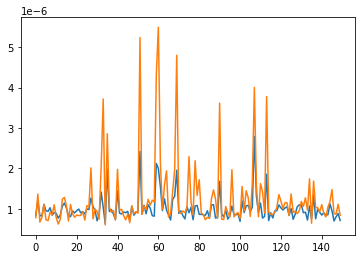

In [55]:
plt.figure();
plt.plot(np.mean(features, axis=0))
plt.plot(np.std(features, axis=0))


In [124]:
bad_prfs = np.where(np.array(lda_result['val_dprime'])<0)[0]
bad_prfs

array([357, 418, 419, 432, 437, 439, 650, 665])

In [106]:
models[bad_prfs,:]

array([[-0.55      ,  0.33      ,  0.04      ],
       [ 0.495     ,  0.495     ,  0.04      ],
       [ 0.55      ,  0.495     ,  0.04      ],
       [ 0.11      ,  0.55      ,  0.04      ],
       [ 0.44      ,  0.55      ,  0.04      ],
       [ 0.55      ,  0.55      ,  0.04      ],
       [ 0.55      ,  0.55      ,  0.05816862]])

In [125]:
print('Loading pre-computed features from %s'%features_file)
t = time.time()
with h5py.File(features_file, 'r') as data_set:
    values = np.copy(data_set['/features'][:,:,bad_prfs])
    data_set.close() 
elapsed = time.time() - t
print('Took %.5f seconds to load file'%elapsed)
features_each_prf = values

Loading pre-computed features from /user_data/mmhender/features/sketch_tokens/S1_features_each_prf_grid3.h5py
Took 14.19698 seconds to load file


In [126]:
from utils import texture_utils
n_prf_sd_out = 2
bboxes = []
for ii in range(len(bad_prfs)):
    prf_params = models[bad_prfs[ii],:]
    bbox = texture_utils.get_bbox_from_prf(prf_params, [227,227], n_prf_sd_out, \
                                           min_pix=None, verbose=False, force_square=False)  
    bboxes+=[bbox]
    
bboxes

[[7, 46, 0, 8],
 [0, 21, 206, 227],
 [0, 21, 219, 227],
 [0, 8, 119, 158],
 [0, 8, 181, 220],
 [0, 8, 206, 227],
 [0, 34, 211, 227],
 [0, 16, 211, 227]]

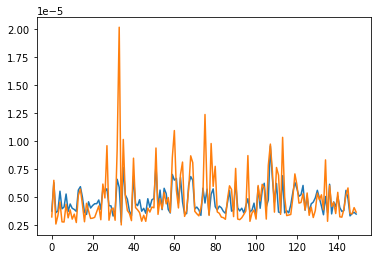

In [127]:
plt.figure();
plt.plot(np.mean(values[:,0:150,0], axis=0))
plt.plot(np.std(values[:,0:150,0], axis=0))

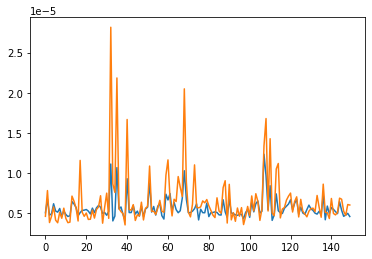

In [90]:
plt.figure();
plt.plot(np.mean(values[:,0:150,1], axis=0))
plt.plot(np.std(values[:,0:150,1], axis=0))

In [86]:
np.sum(values[:,0:150,0]==0)

8